# Part V: Forecast Models
-----
-----

----
## CH21: A Gentle Introduction to the Box-Jenkins Method
----

The Autoregressive Integrated Moving Average Model, or ARIMA for short is a standard statistical model for time series forecast and analysis. Along with its development, the authors Box and Jenkins also suggest a process for identifying, estimating, and checking models for a specific time series dataset. This process is now referred to as the Box-Jenkins Method. In this lesson, you will discover the Box-Jenkins Method and tips for using it on your time series forecasting problem. Specifically, you will learn:

- About the ARIMA process and how the 3 steps of the Box-Jenkins Method.
- Best practice heuristics for selecting the q, d, and p model configuration for an ARIMA
model.
- Evaluating models by looking for overfitting and residual errors as a diagnostic process.

Let’s get started.


### Autoregressive Integrated Moving Average Model:

An ARIMA model is a class of statistical model for analyzing and forecasting time series data. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- **AR**: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- **I**: Integrated. The use of differencing of raw observations (i.e. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- **MA**: Moving Average. A model that uses the dependency between an observation and residual errors from a moving average model applied to lagged observations.

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of `ARIMA(p,d,q)` where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used. The parameters of the ARIMA model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree
of differencing.
- q: The size of the moving average window, also called the order of moving average.



### Box-Jenkins Method:

The Box-Jenkins method was proposed by George Box and Gwilym Jenkins in their seminal 1970 textbook Time Series Analysis: Forecasting and Control1. The approach starts with the assumption that the process that generated the time series can be approximated using an ARMA model if it is stationary or an ARIMA model if it is non-stationary. The 2016 5th edition of the textbook (Part Two, page 177) refers to the process as a stochastic model building and that it is an iterative approach that consists of the following 3 steps:

1. **Identification.** Use the data and all related information to help select a sub-class of model that may best summarize the data.
2. **Estimation.** Use the data to train the parameters of the model (i.e. the coefficients).
3. **Diagnostic Checking.** Evaluate the fitted model in the context of the available data
and check for areas where the model may be improved.

It is an iterative process, so that as new information is gained during diagnostics, you can circle back to step 1 and incorporate that into new model classes. Let’s take a look at these steps in more detail.

#### **Identification.**

The identification step is further broken down into: Assess whether the time series is stationary, and if not, how many differences are required to make it stationary. Identify the parameters of an ARMA model for the data.

1. *Differencing:* Below are some tips during identification.

- Unit Root Tests. Use unit root statistical tests on the time series to determine whether or not it is stationary. Repeat after each round of differencing.
- Avoid over differencing. Differencing the time series more than is required can result in the addition of extra serial correlation and additional complexity.

2. *Configuring AR and MA:* Two diagnostic plots can be used to help choose the p and q parameters of the ARMA or ARIMA. They are:

- `Autocorrelation Function (ACF)`. The plot summarizes the correlation of an observation with lag values. The x-axis shows the lag and the y-axis shows the correlation coefficient between -1 and 1 for negative and positive correlation.
- `Partial Autocorrelation Function (PACF)`. The plot summarizes the correlations for an observation with lag values that is not accounted for by prior lagged observations.

Both plots are drawn as bar charts showing the 95% and 99% confidence intervals as horizontal lines. Bars that cross these confidence intervals are therefore more significant and worth noting. Some useful patterns you may observe on these plots are:

- The model is `AR` if the `ACF` trails off after a lag and has a hard cut-off in the `PACF` after a lag. This lag is taken as the value for `p`.
- The model is `MA` if the `PACF` trails off after a lag and has a hard cut-off in the `ACF` after the lag. This lag value is taken as the value for `q`.
- The model is a mix of `AR` and `MA` if both the `ACF` and `PACF` trail off.

#### **Estimation.**

Estimation involves using numerical methods to minimize a loss or error term. We will not go into the details of estimating model parameters as these details are handled by the chosen library or tool. I would recommend referring to a textbook for a deeper understanding of the optimization problem to be solved by ARMA and ARIMA models and optimization methods like Limited-memory BFGS used to solve it.


#### **Diagnostic Checking.**

The idea of diagnostic checking is to look for evidence that the model is not a good fit for the data. Two useful areas to investigate diagnostics are:

1. *Overfitting:* The first check is to check whether the model overfits the data. Generally, this means that the model is more complex than it needs to be and captures random noise in the training data. This is a problem for time series forecasting because it negatively impacts the ability of the model to generalize, resulting in poor forecast performance on out-of-sample data. Careful attention must be paid to both in-sample and out-of-sample performance and this requires the careful design of a robust test harness for evaluating models.


2. *Residual Errors:* Forecast residuals provide a great opportunity for diagnostics. A review of the distribution of errors can help tease out bias in the model. The errors from an ideal model would resemble white noise, that is a Gaussian distribution with a mean of zero and a symmetrical variance. For this, you may use density plots, histograms, and Q-Q plots that compare the distribution of errors to the expected distribution. A non-Gaussian distribution may suggest an opportunity for data pre-processing. A skew in the distribution or a non-zero mean may suggest a bias in forecasts that may be correct.
Additionally, an ideal model would leave no temporal structure in the time series of forecast residuals. These can be checked by creating ACF and PACF plots of the residual error time series. The presence of serial correlation in the residual errors suggests further opportunity for using this information in the model.





---
## CH22: Autoregression Models for Forecasting
---


Autoregression is a time series model that uses observations from previous time steps as input to a regression equation to predict the value at the next time step. It is a very simple idea that can result in accurate forecasts on a range of time series problems. In this tutorial, you will discover how to implement an autoregressive model for time series forecasting with Python. After completing this tutorial, you will know:

- How to explore your time series data for autocorrelation.
- How to develop an autocorrelation model and use it to make predictions. 
- How to use a developed autocorrelation model to make rolling predictions.

Let’s get started.

### Autoregression

A regression model, such as linear regression, models an output value based on a linear combination of input values. For example:

$$ \hat{y} = b_0 + (b_1 \times X_1) $$

Where $\hat{y}$ is the prediction, $b_0$ and $b_1$ are coefficients found by optimizing the model on training data, and $X$ is an input value. This technique can be used on time series where input variables are taken as observations at previous time steps, called `lag` variables. For example, we can predict the value for the next time step `(t+1)` given the observations at the current `t` and previous `t-1`. As a regression model, this would look as follows:

$$ X(t + 1) = b_0 + (b_1 \times X(t)) + (b_2 × X(t − 1)) + \dots  (b_n × X(t − n))$$

Because the regression model uses data from the same input variable at previous time steps,
it is referred to as an autoregression (regression of self).

### Autocorrelation

An autoregression model makes an assumption that the observations at current and previous time steps are useful to predict the value at the next time step. This relationship between variables is called correlation. If both variables change in the same direction (e.g. go up together or down together), this is called a positive correlation. If the variables move in opposite directions as values change (e.g. one goes up and one goes down), then this is called negative correlation.

We can use statistical measures to calculate the correlation between the output variable and values at previous time steps at various different lags. The stronger the correlation between the output variable and a specific lagged variable, the more weight that autoregression model can put on that variable when modeling. Again, because the correlation is calculated between the variable and itself at previous time steps, it is called an autocorrelation. It is also called serial correlation because of the sequenced structure of time series data.

The correlation statistics can also help to choose which lag variables will be useful in a model and which will not. Interestingly, if all lag variables show low or no correlation with the output variable, then it suggests that the time series problem may not be predictable. This can be very useful when getting started on a new dataset.

In this tutorial, we will investigate the autocorrelation of a univariate time series then develop an autoregression model and use it to make predictions.





In this lesson, we will use the Minimum Daily Temperatures dataset as an example. This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="darkgrid") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-dark")    

In [3]:
df = pd.read_csv('daily-min-temperatures.csv', index_col = 0, header = 0, parse_dates = True)

df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


#### Quick Check for Autocorrelation

There is a quick, visual check that we can do to see if there is an autocorrelation in our time series dataset. We can plot the observation at the current time step `(t)` with the observation at the previous time step `(t-1)` as a scatter plot. This could be done manually by first creating a lag version of the time series dataset and using a built-in scatter plot function in the Pandas library. But there is an easier way.

Pandas provides a built-in plot to do exactly this, called the `lag_plot()` function. Below is an example of creating a lag plot of the Minimum Daily Temperatures dataset.

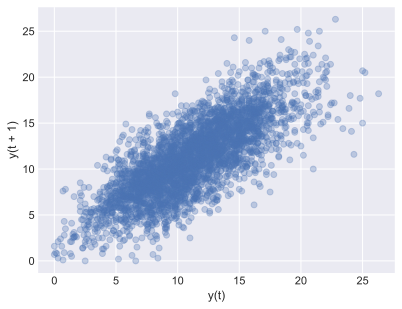

In [4]:
from pandas.plotting import lag_plot

series = df.squeeze('columns')

fig = lag_plot(series, alpha = 0.3)

fig.plot(figsize = (10,6))
plt.grid()

We can see a large ball of observations along a diagonal line of the plot. It clearly shows a relationship or some correlation. This process could be repeated for any other lagged observation, such as if we wanted to review the relationship with the last 7 days or with the same day last month or last year. Another quick check that we can do is to directly calculate the correlation between the observation and the lag variable.

We can use a statistical test like the Pearson’s correlation coefficient. This produces a number to summarize how correlated two variables are between -1 (negatively correlated) and +1 (positively correlated) with small values close to zero indicating low correlation and high
values above 0.5 or below -0.5 showing high correlation.

Correlation can be calculated easily using the `corr()` function on the DataFrame of the
lagged dataset. The example below creates a lagged version of the Minimum Daily Temperatures dataset and calculates a correlation matrix of each column with other columns, including itself.



In [5]:
lag1_series = series.shift(1)

df_mt = pd.concat([lag1_series, series], axis = 1)

df_mt.columns = ['t','t+1']

df_mt.corr()

,t,t+1
t,1.00000,0.77487
t+1,0.77487,1.00000


This is a good confirmation for the plot above. It shows a strong positive correlation (0.77)
between the observation and the lag=1 value. This manual method is good for one-off checks, but tedious if we want to check a large number of lag variables in our time series. Next, we will look at a scaled-up version of this approach.

### Autocorrelation Plots

We can plot the correlation coefficient for each lag variable. This can very quickly give an idea of which lag variables may be good candidates for use in a predictive model and how the relationship between the observation and its historic values changes over time. We could manually calculate the correlation values for each lag variable and plot the result. Thankfully, Pandas provides a built-in plot called the `autocorrelation_plot()` function.

The plot provides the lag number along the x-axis and the correlation coefficient value between -1 and 1 on the y-axis. The plot also includes solid and dashed lines that indicate the 95% and 99% confidence interval for the correlation values. Correlation values above these lines are more significant than those below the line, providing a threshold or cutoff for selecting more relevant lag values.



[]

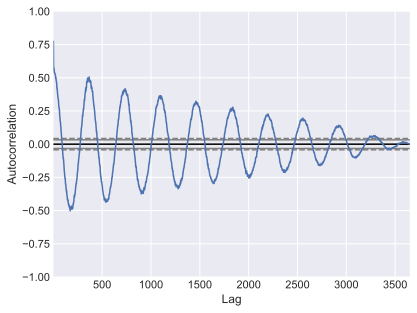

In [6]:
from pandas.plotting import autocorrelation_plot

fig = autocorrelation_plot(series)

fig.plot(figsize = (10,6))


Running the example shows the swing in positive and negative correlation as the temperature
values change across summer and winter seasons each previous year.

The Statsmodels library also provides a version of the plot in the `plot_acf()` function as a line plot.

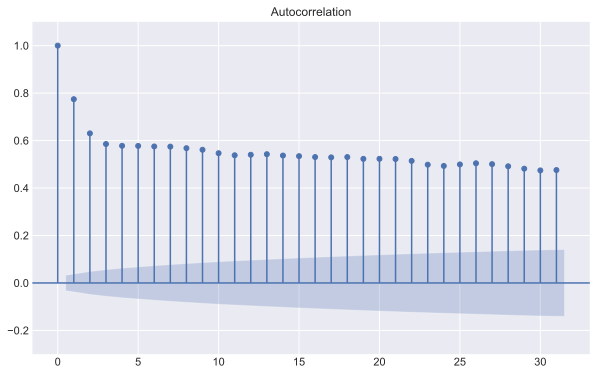

In [7]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axis = plt.subplots(figsize = (10,6))

acf_p = plot_acf(series, lags = 31, ax = axis)

axis.set_ylim(-0.3, 1.1)

axis.grid()




Now that we know how to review the autocorrelation in our time series, let’s look at modeling it with an autoregression. Before we do that, let’s establish a baseline performance.


### Persistence Model 



Let’s say that we want to develop a model to predict the last 7 days of minimum temperatures in the dataset given all prior observations. The simplest model that we could use to make predictions would be to persist the last observation. We can call this a persistence model and it provides a baseline of performance for the problem that we can use for comparison with an autoregression model.

We can develop a test harness for the problem by splitting the observations into training and test sets, with only the last 7 observations in the dataset assigned to the test set as unseen data that we wish to predict. The predictions are made using a walk-forward validation model so that we can persist the most recent observations for the next day. This means that we are not making a 7-day forecast, but a 7, 1-day forecasts.



In [8]:
# we can utilize df_mt we built before 

df_mt.head()

,t,t+1
Date,,
1981-01-01,NaN,20.7
1981-01-02,20.7,17.9
1981-01-03,17.9,18.8
1981-01-04,18.8,14.6
1981-01-05,14.6,15.8


In [9]:
X = df_mt.values

train, test = X[1:len(X)-7], X[len(X)-7:] # ignore the first row of X 

X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]

print(f'Checking the length of the test set: {len(X_test), len(y_test)}')

Checking the length of the test set: (7, 7)


In [10]:
from sklearn.metrics import mean_squared_error

# Persistence model 

def persistence_model(x):
    return x 

# Walkforward validation 

predictions = []

for x in X_test:

    yhat = persistence_model(x)

    predictions.append(yhat)

print(f"RMSE: {np.sqrt(mean_squared_error(predictions, y_test)):.3f}")

RMSE: 1.850


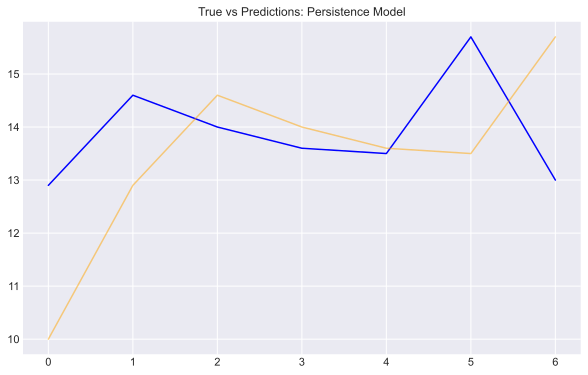

In [11]:
fig, axis = plt.subplots(figsize = (10,6))

axis.plot(y_test, color = 'blue')

axis.plot(predictions, color = 'orange', alpha = 0.5)

axis.set_title('True vs Predictions: Persistence Model')

axis.grid()

### Autoregression Model

An autoregression model is a linear regression model that uses lagged variables as input variables. We could calculate the linear regression model manually using the LinearRegession class in scikit-learn and manually specify the lag input variables to use. Alternately, the Statsmodels library provides an autoregression model that automatically selects an appropriate lag value using statistical tests and trains a linear regression model. It is provided in the `AR` class.


We can use this model by first creating the model `AR()` and then calling `fit()` to train it on our dataset. This returns an ARResult object. Once fit, we can use the model to make a prediction by calling the `predict()` function for a number of observations in the future. This creates 1 7-day forecast, which is different from the persistence example above. The complete example is listed below.




In [113]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [177]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

series = df.squeeze('columns')

X = series.values

select_p = ar_select_order(X, maxlag = 31, ic = 'aic') # changing information criterion changes the selected p - values

p_val = select_p.ar_lags

print(f'p-values to consider in the model: {p_val}')


p-values to consider in the model: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


In [178]:
train, test = X[1:len(X)-7], X[len(X)-7:]

AR_model_L29 = AutoReg(train, lags = 29)

AR_model_LA = AutoReg(train, lags = p_val[-1]) 

model_fit_L29 = AR_model_L29.fit()
model_fit_LA = AR_model_LA.fit()

model_fit_LA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 3642
Model:                    AutoReg(21)   Log Likelihood               -8303.089
Method:               Conditional MLE   S.D. of innovations              2.397
Date:                Sat, 03 Feb 2024   AIC                          16652.178
Time:                        14:15:11   BIC                          16794.652
Sample:                            21   HQIC                         16702.938
                                 3642                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6063      0.146      4.149      0.000       0.320       0.893
y.L1           0.5906      0.017     35.573      0.000       0.558       0.623
y.L2          -0.0913      0.019     -4.735      0.000      -0.129      -0.053
y.L3           0.0482      0.019      2.494      0.013       0.010       0.086
y.L4           0.0410      0.019      2.122      0.034       0.003       0.079
y.L5           0.0406      0.019      2.099      0.036       0.003       0.078
y.L6           0.0275      0.019      1.423      0.155      -0.010       0.065
y.L7           0.0461      0.019      2.384      0.017       0.008       0.084
y.L8           0.0149      0.019      0.769      0.442      -0.023       0.053
y.L9           0.0393      0.019      2.034      0.042       0.001       0.077
y.L10          0.0003      0.019      0.015      0.988      -0.038       0.038
y.L11          0.0062      0.019      0.322      0.748      -0.032       0.044
y.L12          0.0202      0.019      1.042      0.297      -0.018       0.058
y.L13          0.0287      0.019      1.482      0.138      -0.009       0.067
y.L14          0.0005      0.019      0.024      0.981      -0.037       0.038
y.L15          0.0254      0.019      1.313      0.189      -0.013       0.063
y.L16          0.0090      0.019      0.464      0.643      -0.029       0.047
y.L17          0.0129      0.019      0.668      0.504      -0.025       0.051
y.L18          0.0372      0.019      1.924      0.054      -0.001       0.075
y.L19         -0.0063      0.019     -0.327      0.744      -0.044       0.032
y.L20          0.0260      0.019      1.353      0.176      -0.012       0.064
y.L21          0.0280      0.017      1.692      0.091      -0.004       0.061
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0104           -0.0000j            1.0104           -0.0000
AR.2             1.0663           -0.3429j            1.1201           -0.0495
AR.3             1.0663           +0.3429j            1.1201            0.0495
AR.4             0.9396           -0.6683j            1.1530           -0.0984
AR.5             0.9396           +0.6683j            1.1530            0.0984
AR.6             0.7233           -0.9062j            1.1595           -0.1428
AR.7             0.7233           +0.9062j            1.1595            0.1428
AR.8             0.4565           -1.1028j            1.1936           -0.1875
AR.9             0.4565           +1.1028j            1.1936            0.1875
AR.10            0.1224           -1.1602j            1.1666           -0.2333
AR.11            0.1224           +1.1602j            1.1666            0.2333
AR.12           -0.2448           -1.1597j            1.1853           -0.2831
AR

In [179]:
print(f"Chosen Lag ORDER by the ar_select_order: {p_val[-1]}")
print("\n")
print(f"Coefficients of the AR(21) model: {model_fit_LA.params}")
print("\n")
print(f"Coefficients of the AR(29) model: {model_fit_L29.params}")

Chosen Lag ORDER by the ar_select_order: 21


Coefficients of the AR(21) model: [ 6.06338974e-01  5.90583954e-01 -9.12661044e-02  4.82194618e-02
  4.10336829e-02  4.05614397e-02  2.75095876e-02  4.61234402e-02
  1.48755692e-02  3.93447767e-02  2.92151404e-04  6.22165820e-03
  2.01701788e-02  2.86748563e-02  4.69187524e-04  2.53781487e-02
  8.96852541e-03  1.29020220e-02  3.71601480e-02 -6.30247231e-03
  2.60392811e-02  2.80274240e-02]


Coefficients of the AR(29) model: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]


In [180]:
print(f"Total number of parameters in the AR(29) Model: {len(model_fit_L29.params)}")
print(f"Total number of parameters in the AR(21) Model: {len(model_fit_LA.params)}")

Total number of parameters in the AR(29) Model: 30
Total number of parameters in the AR(21) Model: 22


In [181]:
# make predictions

predictions_LA = model_fit_LA.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 
predictions_L29 = model_fit_L29.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 

print("AR(21) Model:")
for i in range(len(predictions_LA)):
    
    print(f'predicted = {predictions_LA[i]}, expected={test[i]}') 

print("AR(29) Model:")
for i in range(len(predictions_L29)):
    
    print(f'predicted = {predictions_L29[i]}, expected={test[i]}') 

rmse_L13 = np.sqrt(mean_squared_error(test, predictions_LA))
print(f'Test RMSE AR(21): {rmse_L13:.3f}')

rmse_L29 = np.sqrt(mean_squared_error(test, predictions_L29))
print(f'Test RMSE AR(29): {rmse_L29:.3f}')

AR(21) Model:
predicted = 11.917992833061348, expected=12.9
predicted = 13.169390098925719, expected=14.6
predicted = 13.667405118504972, expected=14.0
predicted = 13.381034590111588, expected=13.6
predicted = 13.11602262826831, expected=13.5
predicted = 13.02104304768324, expected=15.7
predicted = 12.809941057708963, expected=13.0
AR(29) Model:
predicted = 11.87127484772786, expected=12.9
predicted = 13.053794217229854, expected=14.6
predicted = 13.532590951105162, expected=14.0
predicted = 13.243126458186257, expected=13.6
predicted = 13.091438030688018, expected=13.5
predicted = 13.146988838852272, expected=15.7
predicted = 13.176153455574251, expected=13.0
Test RMSE AR(21): 1.226
Test RMSE AR(29): 1.225


In the cells above we first choose the optimal lag to be fed to the `AutoReg()` regressor. It turns out the the old `AR` regressor of statsmodels is depreciated which automatically obtains the optimal lags making statistical tests on the target variable. Although the this automatic procedure to check p values gives 21, p-values associated with some of the coefficients of the model are not statistically significant. Lets plot the predictions vs true values. 

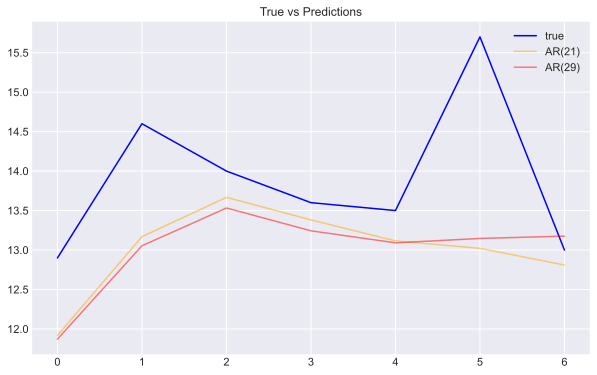

In [182]:
fig, axis = plt.subplots(figsize = (10,6))

axis.plot(test, color = 'blue', label = 'true')

axis.plot(predictions_LA, color = 'orange', alpha = 0.5, label = 'AR(21)')
axis.plot(predictions_L29, color = 'red', alpha = 0.5, label = 'AR(29)')

axis.legend()

axis.set_title('True vs Predictions')

axis.grid()

Check [here](https://python.plainenglish.io/exploring-autoregressive-ar-models-techniques-for-effective-time-series-analysis-c90abcca2266) for possible developments on how to choose the optimal p value for AR(p).

The Statsmodels API does not make it easy to update the model as new observations become available. One way would be to re-train the AR model each day as new observations become available, and that may be a valid approach, if not computationally expensive. An alternative would be to use the learned coefficients and manually make predictions. This requires that the history of 29 prior observations be kept and that the coefficients be retrieved from the model and used in the regression equation to come up with new forecasts.

The coefficients are provided in an array with the intercept term followed by the coefficients for each lag variable starting at t to t-n. We simply need to use them in the right order on the history of observations, as follows:

$$ \hat{y} = b_0 + (b_1 \times X_1) + (b_2 \times X2) + . . . (b_n \times X_n)$$

Below is the complete example using the AR(21) model above.

In [183]:
# sliding window method starting from the last 21 observations in the training set to predict the next and then adding the observations from test set
# to update the history of observations to be used in the auto-regression model 

window = p_val[-1]
coef = model_fit_LA.params

history = train[len(train)-window:]
lag_vars = history.reshape(-1,1) 

predictions = []

for t in range(len(test)):

    yhat = coef[0]

    for d in range(window):

        yhat += coef[d+1] * lag_vars[window-d-1]
    
    predictions.append(yhat)
    obs = test[t]
    lag_vars = np.append(lag_vars[1:],[obs]).reshape(-1,1)
    print(f'predicted: {yhat}, observed: {obs}')

rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Test RMSE AR(21): {rmse:.3f}')

predicted: [11.91799283], observed: 12.9
predicted: [13.74934777], observed: 14.6
predicted: [14.4226764], observed: 14.0
predicted: [13.49424545], observed: 13.6
predicted: [13.32426406], observed: 13.5
predicted: [13.34240217], observed: 15.7
predicted: [14.46629412], observed: 13.0
Test RMSE AR(21): 1.172


There is some improvement when we validate the model using walk forward method (or sliding window method to obtain the predictions).

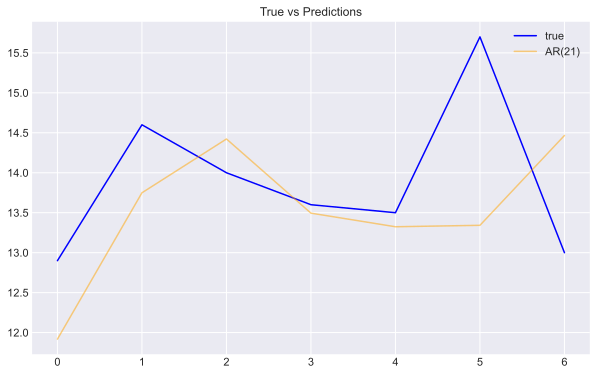

In [184]:
fig, axis = plt.subplots(figsize = (10,6))

axis.plot(test, color = 'blue', label = 'true')

axis.plot(predictions, color = 'orange', alpha = 0.5, label = 'AR(21)')

axis.legend()

axis.set_title('True vs Predictions')

axis.grid()

---
## CH23: Moving Average Models for Forecasting
---

The residual errors from forecasts on a time series provide another source of information that we can model. Residual errors themselves form a time series that can have temporal structure. A simple autoregression model of this structure can be used to predict the forecast error, which in turn can be used to correct forecasts. This type of model is called a moving average model, the same name but very different from moving average smoothing. In this tutorial, you will discover how to model a residual error time series and use it to correct predictions with Python. After completing this tutorial, you will know:

- About how to model residual error time series using an autoregressive model.
- How to develop and evaluate a model of residual error time series.
- How to use a model of residual error to correct predictions and improve forecast skill. 

Let’s get started.

### Model of Residual Errors: 

The difference between what was expected and what was predicted is called the residual error. It is calculated as:

$$ \textrm{residual error} = \textrm{expected} − \textrm{predicted}$$

Just like the input observations themselves, the residual errors from a time series can have temporal structure like trends, bias, and seasonality. Any temporal structure in the time series of residual forecast errors is useful as a diagnostic as it suggests information that could be incorporated into the predictive model. An ideal model would leave no structure in the residual error, just random fluctuations that cannot be modeled.

Structure in the residual error can also be modeled directly. There may be complex signals in the residual error that are difficult to directly incorporate into the model. Instead, you can create a model of the residual error time series and predict the expected error for your model. The predicted error can then be subtracted from the model prediction and in turn provide an additional lift in performance.

A simple and effective model of residual error is an autoregression. This is where some number of lagged error values are used to predict the error at the next time step. These lag errors are combined in a linear regression model, much like an autoregression model of the direct time series observations. An autoregression of the residual error time series is called a Moving Average (MA) model. This is confusing because it has nothing to do with the moving average smoothing process. Think of it as the sibling to the autoregressive (AR) process, except on lagged residual error rather than lagged raw observations.
In this tutorial, we will develop an autoregression model of the residual error time series. Before we dive in, let’s look at a univariate dataset for which we will develop a model.



In this lesson, we will use the Daily Female Births Dataset as an example. This dataset describes the number of daily female births in California in 1959.

#### Persistence Forecast Model:

The simplest forecast that we can make is to forecast that what happened in the previous time step will be the same as what will happen in the next time step. This is called the naive forecast or the persistence forecast model. This model will provide the predictions from which we can calculate the residual error time series. Alternately, we could develop an autoregression model of the time series and use that as our model. We will not develop an autoregression model in this case for brevity and to focus on the model of residual error.

We can implement the persistence model in Python. After the dataset is loaded, it is phrased as a supervised learning problem. A lagged version of the dataset is created where the current time step `(t)` is used as the input variable and the next time step `(t+1)` is taken as the output variable.


In [185]:
df = pd.read_csv('daily-total-female-births.csv', index_col=0, header=0, parse_dates=True)

df.head()

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [186]:
series = df.squeeze('columns')

lag1_series = series.shift(1)

df_fb = pd.concat([lag1_series,series], axis = 1)

df_fb.columns = ['t', 't+1']

df_fb.head()

,t,t+1
Date,,
1959-01-01,NaN,35
1959-01-02,35.0,32
1959-01-03,32.0,30
1959-01-04,30.0,31
1959-01-05,31.0,44


In [187]:
from sklearn.metrics import mean_squared_error

X = df_fb.values

train_split = int(len(X)*0.66)
train, test = X[1:train_split], X[train_split:]

X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]

# predictions according to the persistence model 
predictions = [x for x in X_test]

# check the performence of persistence model

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE:{rmse:.3f}')

# and compute the residuals

residuals = [y_test[i]-predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)

residuals.columns = ['residuals']

print(residuals.head())

Test RMSE:9.151
   residuals
0        9.0
1      -10.0
2        3.0
3       -6.0
4       30.0


We now have a residual error time series that we can model. 

### Autoregression of Residual Error:

We can model the residual error time series using an autoregression model. This is a linear regression model that creates a weighted linear sum of lagged residual error terms. For example:

$$ \textrm{error}(t + 1) = b_0 + (b_1 \times \textrm{error}(t)) + (b_2 \times \textrm{error}(t − 1)) . . . + (b_n \times \textrm{error}(t − n)) $$

We can use the autoregression model (`AutoReg`) provided by the Statsmodels library. Building on the persistence model in the previous section, we can first train the model on the residual errors calculated on the training dataset. This requires that we make persistence predictions for each observation in the training dataset, then create the `AutoReg` model, as follows.



In [199]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# first we apply persistence model to the training set to obtain the training residuals that we will model using AutoReg

train_pred = [x for x in X_train]

train_resid = [y_train[i] - train_pred[i] for i in range(len(train_pred))]

# Find the optimal p value for the AutoRegressive Model 

select_p = ar_select_order(train_resid, maxlag = 60, ic = 'aic') # changing information criterion changes the selected p - values

p_val = select_p.ar_lags

print(f'p-values to consider in the model: {p_val}')

p-values to consider in the model: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


See the official documentation of `ar_select_order()` [here](https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ar_select_order.html).

In [200]:
AR_model= AutoReg(train_resid, lags = p_val[-1]) 

model_fit= AR_model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                  239
Model:                    AutoReg(10)   Log Likelihood                -769.119
Method:               Conditional MLE   S.D. of innovations              6.956
Date:                Sat, 03 Feb 2024   AIC                           1562.238
Time:                        15:00:03   BIC                           1603.442
Sample:                            10   HQIC                          1578.861
                                  239                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1755      0.460      0.381      0.703      -0.727       1.078
y.L1          -0.8358      0.066    -12.671      0.000      -0.965      -0.707
y.L2          -0.7527      0.086     -8.771      0.000      -0.921      -0.584
y.L3          -0.7307      0.099     -7.403      0.000      -0.924      -0.537
y.L4          -0.6872      0.107     -6.402      0.000      -0.898      -0.477
y.L5          -0.5766      0.112     -5.160      0.000      -0.796      -0.358
y.L6          -0.4844      0.111     -4.346      0.000      -0.703      -0.266
y.L7          -0.3576      0.107     -3.356      0.001      -0.567      -0.149
y.L8          -0.1473      0.098     -1.504      0.133      -0.339       0.045
y.L9          -0.0898      0.085     -1.053      0.292      -0.257       0.077
y.L10         -0.0442      0.065     -0.677      0.498      -0.172       0.084
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.8950           -0.8911j            1.2629           -0.3754
AR.2            -0.8950           +0.8911j            1.2629            0.3754
AR.3            -1.4994           -0.2117j            1.5143           -0.4777
AR.4            -1.4994           +0.2117j            1.5143            0.4777
AR.5             0.8612           -0.8179j            1.1877           -0.1209
AR.6             0.8612           +0.8179j            1.1877            0.1209
AR.7            -0.0785           -1.3066j            1.3090           -0.2595
AR.8            -0.0785           +1.3066j            1.3090            0.2595
AR.9             0.5954           -1.4858j            1.6006           -0.1893
AR.10            0.5954           +1.4858j            1.6006            0.1893
------------------------------------------------------------------------------
"""

In [210]:
print(f"Fit coefficient for the AR({p_val[-1]}) Model on the residuals:")
print(f"{model_fit.params}")

Fit coefficient for the AR(10) Model on the residuals:
[ 0.17548238 -0.83578136 -0.75265173 -0.7307369  -0.687218   -0.57659026
 -0.48435077 -0.35762657 -0.1473377  -0.08975489 -0.04415659]


Next, we can step through the test dataset and for each time step we must: 

1. Calculate the persistence prediction `(t+1 = t)`.
2. Predict the residual error using the autoregression model.

The autoregression model requires the residual error of the 10 previous time steps. Therefore, we must keep these values handy. As we step through the test dataset timestep by timestep making predictions and estimating error, we can then calculate the actual residual error and update the residual error time series lag values (history) so that we can calculate the error at the next time step.

This is a walk forward forecast, or a rolling forecast, model. We end up with a time series of the residual forecast error from the train dataset and a predicted residual error on the test dataset. We can plot these and get a quick idea of how skillful the model is at predicting residual error. The complete example is listed below.

In [206]:
window = p_val[-1]
coef = model_fit.params

history = [x for x in train_resid[len(train_resid)-window:]] # last 10 vals of training residuals 
lag_vars = history


expected_error = [] # expected error on the test set according to the persistance model, which is what we used to obtain the training error used in the AR model
pred_error = []

for t in range(len(test)):

    # get expected error as we loop through the test set
    yhat = X_test[t]
    error = y_test[t] - yhat
    expected_error.append(error)


    pred_e = coef[0]

    for d in range(window):

        pred_e += coef[d+1] * lag_vars[window-d-1]
    
    pred_error.append(pred_e)
    lag_vars = np.append(lag_vars[1:],[error])
    print(f'predicted: {pred_e}, observed: {error}')


predicted: 1.1972801257403818, observed: 9.0
predicted: -6.736720262999368, observed: -10.0
predicted: 3.020806103501868, observed: 3.0
predicted: 0.33891586632082743, observed: -6.0
predicted: 6.127967171664717, observed: 30.0
predicted: -19.03158040551399, observed: -28.0
predicted: 5.339598222667129, observed: 2.0
predicted: 2.2466099176685024, observed: 9.0
predicted: -4.443390139448807, observed: -7.0
predicted: 2.1896602711336555, observed: 1.0
predicted: 0.4750850822582443, observed: -9.0
predicted: 8.611230275376316, observed: 21.0
predicted: -6.68081260843826, observed: -13.0
predicted: 1.7838380978758375, observed: -2.0
predicted: 2.959994466787783, observed: 11.0
predicted: -5.505624563547548, observed: -11.0
predicted: 3.513607869722359, observed: -8.0
predicted: 9.10371595491563, observed: 6.0
predicted: 3.145678828594355, observed: 16.0
predicted: -7.362736565699514, observed: -12.0
predicted: 1.4335879612712765, observed: 9.0
predicted: -7.588938729941873, observed: 2.0


Running the example first prints the predicted and expected residual error for each time step in the test dataset.

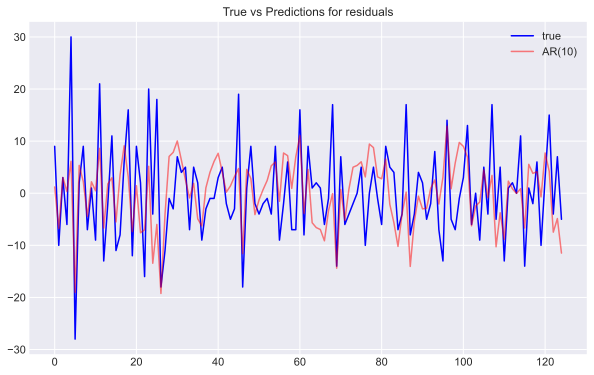

In [208]:
fig, axis = plt.subplots(figsize = (10,6))

axis.plot(expected_error, color = 'blue', label = 'true')

axis.plot(pred_error, color = 'red', alpha = 0.5, label = 'AR(10)')

axis.legend()

axis.set_title('True vs Predictions for residuals')

axis.grid()

Now that we know how to model residual error, next we will look at how we can go about
correcting forecasts and improving model skill.


### Correct Predictions with a Model of Residuals: 

A model of forecast residual error is interesting, but it can also be useful to make better predictions. With a good estimate of forecast error at a time step, we can make better predictions. For example, we can add the expected forecast error to a prediction to correct it and in turn improve the skill of the model.

$$ \textrm{improved forecast} = \textrm{forecast} + \textrm{estimated error} $$

In [209]:
window = p_val[-1]
coef = model_fit.params

history = [x for x in train_resid[len(train_resid)-window:]] # last 10 vals of training residuals 
lag_vars = history

predictions = []

for t in range(len(test)):

    # get expected error as we loop through the test set
    yhat = X_test[t]
    error = y_test[t] - yhat
    
    pred_e = coef[0]

    for d in range(window):

        pred_e += coef[d+1] * lag_vars[window-d-1]
    
    # correct the prediction of the persistence model       
    yhat = yhat + pred_e
    predictions.append(yhat)
    # update the lag variables ignoring the first so that its length is fixed
    lag_vars = np.append(lag_vars[1:],[error]) 
    print(f'predicted: {yhat}, observed: {y_test[t]}')

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'Test RMSE using AR(10) on the residuals: {rmse:.3f}')

predicted: 43.197280125740384, observed: 51.0
predicted: 44.26327973700063, observed: 41.0
predicted: 44.02080610350187, observed: 44.0
predicted: 44.338915866320825, observed: 38.0
predicted: 44.127967171664714, observed: 68.0
predicted: 48.96841959448601, observed: 40.0
predicted: 45.33959822266713, observed: 42.0
predicted: 44.2466099176685, observed: 51.0
predicted: 46.55660986055119, observed: 44.0
predicted: 46.189660271133654, observed: 45.0
predicted: 45.475085082258246, observed: 36.0
predicted: 44.611230275376315, observed: 57.0
predicted: 50.31918739156174, observed: 44.0
predicted: 45.78383809787584, observed: 42.0
predicted: 44.95999446678778, observed: 53.0
predicted: 47.49437543645245, observed: 42.0
predicted: 45.51360786972236, observed: 34.0
predicted: 43.10371595491563, observed: 40.0
predicted: 43.145678828594356, observed: 56.0
predicted: 48.637263434300486, observed: 44.0
predicted: 45.43358796127128, observed: 53.0
predicted: 45.41106127005813, observed: 55.0
pre

Running the example prints the predictions and the expected outcome for each time step in the test dataset. The RMSE of the corrected forecasts is calculated to be 7.675 births per day, which is much better than the score of 9.151 for the persistence model alone.

Finally, the expected values for the test dataset are plotted compared to the corrected forecast. We can see that the persistence model has been aggressively corrected back to a time series that looks something like a moving average.

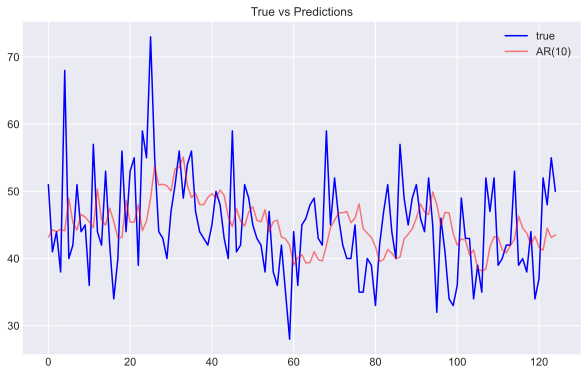

In [211]:
fig, axis = plt.subplots(figsize = (10,6))

axis.plot(y_test, color = 'blue', label = 'true')

axis.plot(predictions, color = 'red', alpha = 0.5, label = 'AR(10)')

axis.legend()

axis.set_title('True vs Predictions')

axis.grid()

---
## CH24: ARIMA Model for Forecasting
---

A popular and widely used statistical method for time series forecasting is the ARIMA model. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data. In this tutorial, you will discover how to develop an ARIMA model for time series data with Python. After completing this tutorial, you will know:

- About the ARIMA model the parameters used and assumptions made by the model. 
- How to fit an ARIMA model to data and use it to make forecasts.
- How to configure the ARIMA model on your time series problem.

Let’s get started.


### Autoregressive Integrated Moving Average Model:

An ARIMA model is a class of statistical models for analyzing and forecasting time series data. It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts. ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration. This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- *AR*: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- *I*: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- *MA*: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations

Each of these components are explicitly specified in the model as a parameter. A standard notation is used of `ARIMA(p,d,q)` where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.
The parameters of the ARIMA model are defined as follows:

- `p`: The number of lag observations included in the model, also called the lag order.
- `d`: The number of times that the raw observations are differenced, also called the degree of differencing.
- `q`: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model. A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model. Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.

In this lesson, we will use the Shampoo Sales dataset as an example. This dataset describes the monthly number of sales of shampoo over a 3 year period.


In [212]:
df = pd.read_csv('monthly-shampoo-sales.csv', index_col=0, header = 0, parse_dates= True)

df.head()

,Sales
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [330]:
# Define a custom parser function to add a fiducial year value so that Python can recognize datetime better
from datetime import datetime

def custom_parser(x):
    return datetime.strptime('190' + x, '%Y-%m')

df = pd.read_csv('monthly-shampoo-sales.csv', index_col=0, header = 0, parse_dates= True, date_parser = custom_parser)

df.head()

,Sales
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


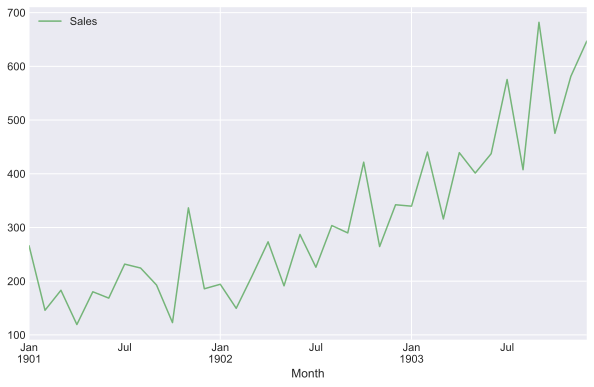

In [331]:
fig, axis = plt.subplots(figsize = (10,6))

df.plot(color = 'green', alpha = 0.5, ax = axis)

axis.grid()

We can see that the Shampoo Sales dataset has a clear trend. This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1. Let’s also take a quick look at an autocorrelation plots of the time series.

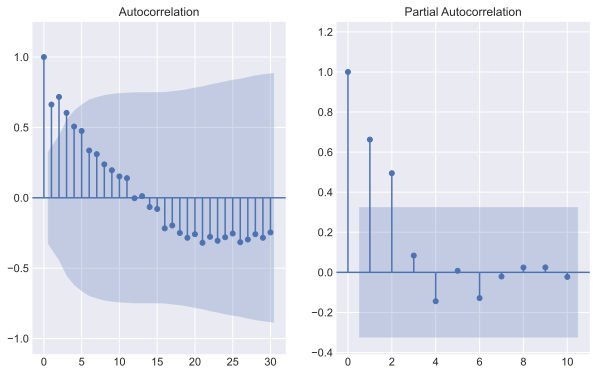

In [332]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

series = df.squeeze('columns')

fig, axis = plt.subplots(1,2,figsize=(10,6))

ax1 = plot_acf(series, ax = axis[0], alpha = 0.05, lags = 30, auto_ylims=True)

ax2 = plot_pacf(series, ax = axis[1], alpha = 0.05, lags=10,  auto_ylims=True)

axis[0].grid()
axis[1].grid()

ACF tells us that after the 3rd lag Auto-correlation drops and becomes statistically insignificant. A sharp drop in the PACF after the 2nd lag in the PACF also supports this. So a good parameter choice for the Auto-regressive component of the model may be a `p = 2`. Lets also confirm this using pandas built-in `autocorrelation_plot` function

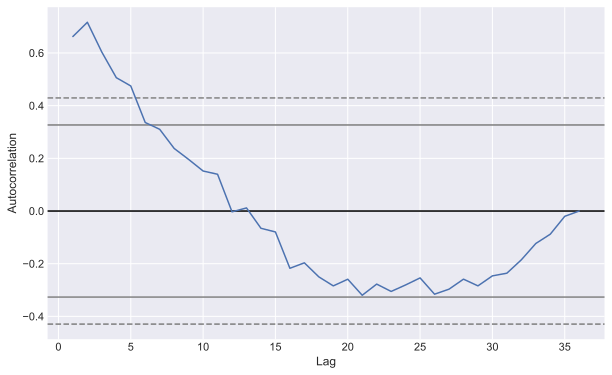

In [333]:
from pandas.plotting import autocorrelation_plot

fig, axis = plt.subplots(figsize=(10,6))

ap = autocorrelation_plot(series, ax = axis)


As shown after the 5th lag, auto-correlation becomes less statistically significant. This suggests a good starting point for the Auto-regressive component to have `p = 5`.  We can check both options below and compare the resulting AIC of the models. 

### ARIMA with Python:

The Statsmodels library provides the capability to fit an ARIMA model. An ARIMA model can be created using the Statsmodels library as follows:

1. Define the model by calling `ARIMA()` and passing in the `p`, `d`, and `q` parameters. 
2. The model is prepared on the training data by calling the `fit()` function.
3. Predictions can be made by calling the `predict()` function and specifying the index of
the time or times to be predicted.

Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors. First, we fit an `ARIMA(2,1,0)` model. This sets the lag value to 2 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.



In [334]:
series.index = series.index.to_period('M') # Required so that ARIMA model below can understand freq of the data 

In [344]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(series, order = (2,1,0), trend = 't')

model_fit = model.fit()

model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -197.786
Date:                Sat, 03 Feb 2024   AIC                            403.573
Time:                        20:13:48   BIC                            409.794
Sample:                    01-31-1901   HQIC                           405.720
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            11.6519      5.987      1.946      0.052      -0.083      23.387
ar.L1         -1.0230      0.208     -4.918      0.000      -1.431      -0.615
ar.L2         -0.3659      0.169     -2.164      0.030      -0.697      -0.034
sigma2      4602.0284   1384.079      3.325      0.001    1889.283    7314.773
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.73
Prob(Q):                              0.89   Prob(JB):                         0.69
Heteroskedasticity (H):               0.86   Skew:                             0.25
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

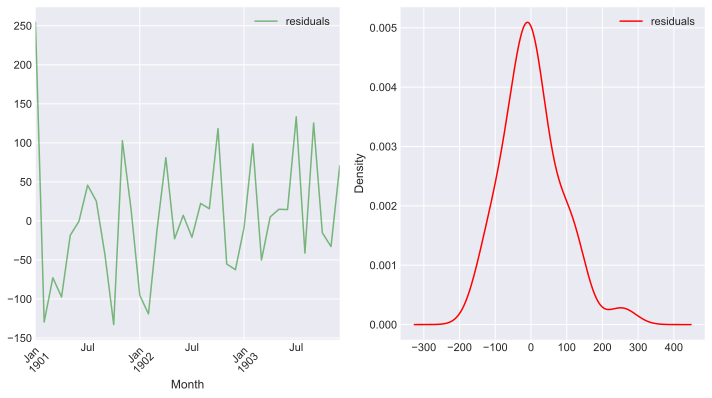

In [345]:
# Plot residuals and their distribution 

residuals_df = pd.DataFrame(model_fit.resid)

residuals_df.columns = ['residuals']

fig, axis = plt.subplots(1,2, figsize = (12,6))

residuals_df.plot(ax = axis[0], color = 'green', alpha = 0.5)
residuals_df.plot(kind = 'kde', ax = axis[1], color = 'red')

axis[0].tick_params(axis = 'x', rotation = 45)

axis[0].grid()
axis[1].grid()

In [346]:
residuals_df.describe()

,residuals
count,36.000000
mean,3.313299
std,82.144179
min,-132.834464
25%,-45.448288
50%,-4.457635
75%,30.404361
max,254.348086


First, we get a line plot of the residual errors, suggesting that there may still be some trend information not captured by the model. Next, we get a density plot of the residual error values, suggesting the errors are Gaussian, but may not be centered on zero. 

The distribution of the residual errors is displayed. The results show that indeed there is a bias in the prediction (a non-zero mean in the residuals).

Note, that although above we used the entire dataset for time series analysis, ideally we would perform this analysis on just the training dataset when developing a predictive model. Next, let’s look at how we can use the ARIMA model to make forecasts.

### Rolling Forecast ARIMA Model:

The ARIMA model can be used to forecast future time steps. We can use the `predict()` function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as `start=101`, `end=101`. This would return an array with one element containing the prediction. We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (`d > 0` when configuring the model). This can be specified by setting the `typ` argument to the value `levels`: `typ='levels'`.

Alternately, we can avoid all of these specifications by using the forecast() function5 which performs a one-step forecast using the model. We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received. We manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended each iteration. Putting this all together, below is an example of a rolling forecast with the ARIMA model in Python.


In [349]:
X = series.values

train_split = int(len(X)*0.66)
train, test = X[:train_split], X[train_split:]

history = [x for x in train] # train history 

predictions = []

for t in range(len(test)):

    model = ARIMA(history, order = (2,1,0), trend = 't')

    model_fit = model.fit()

    forecast = model_fit.forecast()[0]

    predictions.append(forecast)

    obs = test[t]

    history.append(obs)

    print(f"Predicted: {forecast}, Observed: {obs}")

    

Predicted: 384.46045890937387, Observed: 342.3
Predicted: 316.90483483423077, Observed: 339.7
Predicted: 337.3355259888401, Observed: 440.4
Predicted: 378.2000642592823, Observed: 315.9
Predicted: 413.4160322188661, Observed: 439.3
Predicted: 370.9369993705305, Observed: 401.3
Predicted: 425.7736035760706, Observed: 437.4
Predicted: 429.40321603467066, Observed: 575.5
Predicted: 474.45990641464414, Observed: 407.6
Predicted: 542.8085233623717, Observed: 682.0
Predicted: 480.65798715560516, Observed: 475.3
Predicted: 634.3976446642206, Observed: 581.3
Predicted: 561.0821559672133, Observed: 646.9


In [350]:
# Evaluate the model 

rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"Test RMSE for ARIMA(2,1,0) Model: {rmse:.3f}")

Test RMSE for ARIMA(2,1,0) Model: 75.411


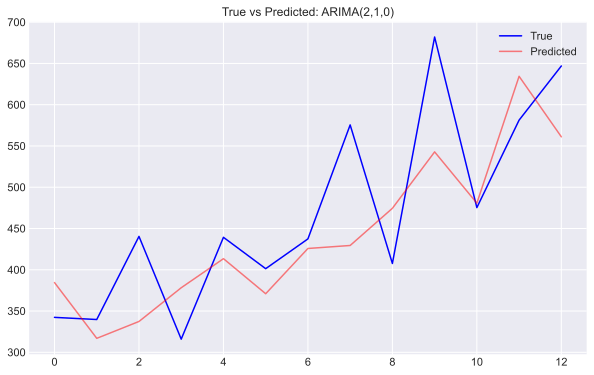

In [352]:
# Plot forecasts vs observed 

fig, axis = plt.subplots(figsize = (10,6))

axis.plot(test, color = 'blue', label = 'True')
axis.plot(predictions, color = 'red', alpha = 0.5, label = 'Predicted')


axis.set_title('True vs Predicted: ARIMA(2,1,0)')
axis.grid()
axis.legend()

The model could use further tuning of the `p`, `d`, and maybe even the `q` parameters.

---
## CH25: Autocorrelation and Partial Autocorrelation
---

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting. These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. The difference between autocorrelation and partial autocorrelation can be difficult and confusing for beginners to time series forecasting. In this tutorial, you will discover how to calculate and plot autocorrelation and partial correlation plots with Python. After completing this tutorial, you will know:

- How to plot and review the autocorrelation function for a time series.
- How to plot and review the partial autocorrelation function for a time series.
- The difference between autocorrelation and partial autocorrelation functions for time series analysis.

Let’s get started.

In this lesson, we will use the Minimum Daily Temperatures dataset as an example. This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

### Correlation and Autocorrelation: 

Statistical correlation summarizes the strength of the relationship between two variables. We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables. The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation. A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the `plot_acf()` function from the Statsmodels library.






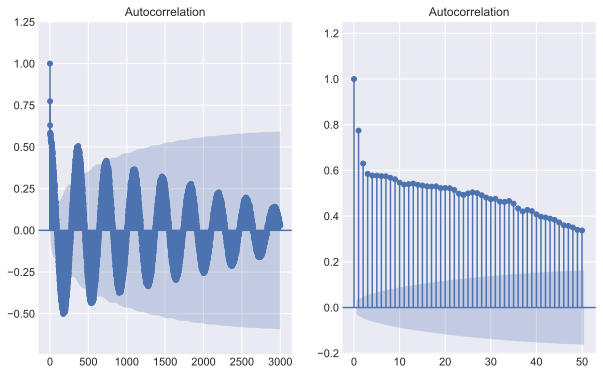

In [365]:
from statsmodels.graphics.tsaplots import plot_acf

df = pd.read_csv('daily-min-temperatures.csv', index_col = 0, header = 0, parse_dates = True)

series = df.squeeze('columns')

fig, axis = plt.subplots(1,2, figsize = (10,6))

lags = [3000, 50]

for index, lag in enumerate(lags):
    
    acp = plot_acf(series, ax = axis[index], auto_ylims=True, lags = lag)
    
    axis[index].grid()

Running the example creates a 2D plot showing the lag value along the x-axis and the correlation on the y-axis between -1 and 1. Confidence intervals are drawn as a cone. By default, this is set to a 95% confidence interval, suggesting that correlation values outside of this cone are very likely a correlation and not a statistical fluke.

### Partial Autocorrelation Function:

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed. The partial autocorrelation at `lag k` is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation. The example below calculates and plots a partial autocorrelation function for the first 50 lags in the Minimum Daily Temperatures dataset using the `plot_pacf()`function from the Statsmodels library.



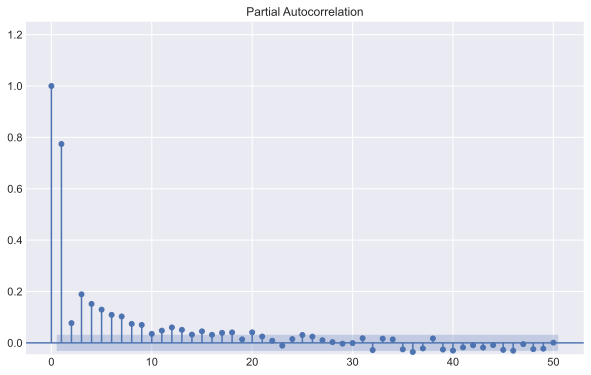

In [371]:
from statsmodels.graphics.tsaplots import plot_pacf

df = pd.read_csv('daily-min-temperatures.csv', index_col = 0, header = 0, parse_dates = True)

series = df.squeeze('columns')

fig, axis = plt.subplots(figsize = (10,6))

acp = plot_pacf(series, ax = axis, auto_ylims=True, lags = 50)
    
axis.grid()

### Intuition for ACF and PACF Plots: 

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story. We can use the intuition for ACF and PACF above to explore some thought experiments.

#### Autoregression Intuition

Consider a time series that was generated by an autoregression (`AR`) process with a lag of `k`. We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the `AR(k)` time series to be strong to a lag of `k` and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond `k`. This is exactly the expectation of the ACF and PACF plots for an `AR(k)` process.

#### Moving Average Intuition

Consider a time series that was generated by a moving average `(MA)` process with a lag of `k`. Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts. We would expect the ACF for the `MA(k)` process to show a strong correlation with recent values up to the lag of `k`, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards. Again, this is exactly the expectation of the ACF and PACF plots for an `MA(k)` process.


